# Métodos de suavizado de series de tiempo
## Promedio móvil
El promedio móvil se construye sustituyendo cada valor de una serie por la media obtenida con esa observación, y valores anteriores y posteriores

![Promedio móvil](https://github.com/JASDataCTG/Diplomado-ML/blob/main/Modulo%209/Notebooks/promov.png?raw=1)

## Promedio móvil ponderado
Para mostrar el uso de éste método, se utilizará la primera parte del ejemplo anterior de la venta de gasolina. El método consiste en asignar un factor de ponderación distinto para cada dato. Generalmente, a la observación o dato más reciente a partir del que se quiere hacer el pronóstico, se le asigna el mayor peso, y este peso disminuye en los valores de datos más antiguos.

![Promedio móvil ponderado](https://github.com/JASDataCTG/Diplomado-ML/blob/main/Modulo%209/Notebooks/promovpon.png?raw=1)

## Suavizamiento exponencial
El suavizamiento exponencial emplea un promedio ponderado de la serie de tiempo pasada como pronóstico; es un caso especial del método de promedios móviles ponderados en el cual sólo se selecciona un peso o factor de ponderación: el de la observación más reciente. En la práctica comenzamos haciendo que F1, el primer valor de la serie de valores uniformados, sea igual a $Y_1$.

$F_{t+1}=\alpha Y_{t}(1-\alpha)F_1$

![Suavizado](https://github.com/JASDataCTG/Diplomado-ML/blob/main/Modulo%209/Notebooks/suavizamiento.png?raw=1)

In [1]:
# Importar los modulos necesarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Cargar los datos
url='https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%209/Datasets/pasajeros.csv'
df = pd.read_csv(url)
df.head()

,mes,pasajeros
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mes        240 non-null    object
 1   pasajeros  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [4]:
df['mes'] = pd.to_datetime(df['mes'])
df.dtypes

mes          datetime64[ns]
pasajeros             int64
dtype: object

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

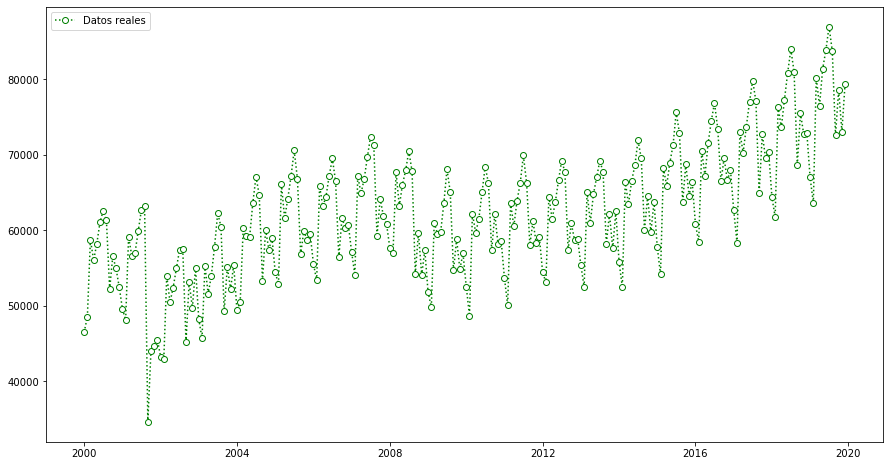

In [5]:
# Visualización
plt.figure(figsize=(15,8))
plt.plot(df['mes'],df['pasajeros'],'go:',markerfacecolor='w')

plt.legend(['Datos reales'])
plt.show()

In [6]:
# Dividir los datos en conjuntos de entrenamiento y validación
date = '2016-12-01'
df_train = df[df['mes'] <= datetime.datetime.strptime(date,'%Y-%m-%d')]
df_test = df[df['mes'] > datetime.datetime.strptime(date,'%Y-%m-%d')]

In [7]:
df_train.tail()

,mes,pasajeros
199,2016-08-01,73450
200,2016-09-01,66477
201,2016-10-01,69539
202,2016-11-01,66591
203,2016-12-01,67983


In [8]:
df_test.head()

,mes,pasajeros
204,2017-01-01,62621
205,2017-02-01,58377
206,2017-03-01,72962
207,2017-04-01,70262
208,2017-05-01,73679


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

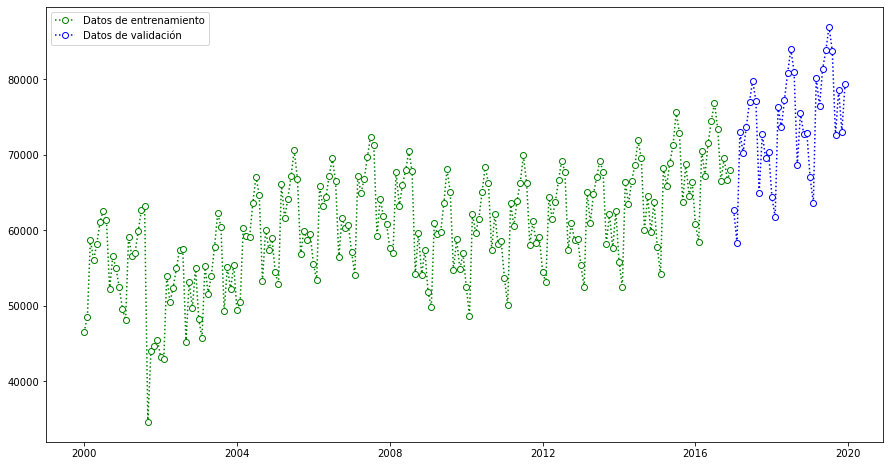

In [9]:
# visualzation
plt.figure(figsize=(15,8))
plt.plot(df_train['mes'],df_train['pasajeros'],'go:',markerfacecolor='w')
plt.plot(df_test['mes'],df_test['pasajeros'],'bo:',markerfacecolor='w')

plt.legend(['Datos de entrenamiento','Datos de validación'])
plt.show()

# Pronósticos utilizando métodos de suavizado
## Naive forecasting
$Y_{t+1} = Y_t$

In [10]:
df_train['valor_ajustado'] = df_train['pasajeros'].shift()# un corrimiento de 1por defecto

/home/javier/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [11]:
df_train.head()

,mes,pasajeros,valor_ajustado
0,2000-01-01,46492,NaN
1,2000-02-01,48526,46492.0
2,2000-03-01,58764,48526.0
3,2000-04-01,56033,58764.0
4,2000-05-01,58201,56033.0


In [12]:
df_train.tail()

,mes,pasajeros,valor_ajustado
199,2016-08-01,73450,76886.0
200,2016-09-01,66477,73450.0
201,2016-10-01,69539,66477.0
202,2016-11-01,66591,69539.0
203,2016-12-01,67983,66591.0


In [13]:
df_test['prediccion'] = 67983
df_test.head()

/home/javier/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,mes,pasajeros,prediccion
204,2017-01-01,62621,67983
205,2017-02-01,58377,67983
206,2017-03-01,72962,67983
207,2017-04-01,70262,67983
208,2017-05-01,73679,67983


In [14]:
# Calcular el margen de error
error = df_train['pasajeros'] - df_train['valor_ajustado']
me = 1.96*error.std()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

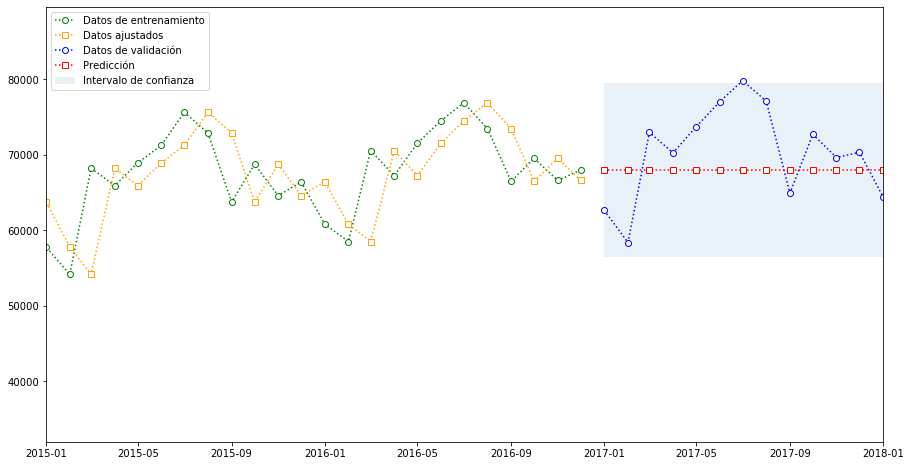

In [15]:
# Visualización del modelo
plt.figure(figsize=(15,8))
plt.plot(df_train['mes'],df_train['pasajeros'],'go:',markerfacecolor='w')
# Valores ajustados
plt.plot(df_train['mes'],df_train['valor_ajustado'],'s:',color='orange',markerfacecolor='w')


plt.plot(df_test['mes'],df_test['pasajeros'],'bo:',markerfacecolor='w')
# Predicción
plt.plot(df_test['mes'],df_test['prediccion'],'s:',color='red',markerfacecolor='w')

# Mostrar intervalo de confianza
plt.fill_between(df_test['mes'],(df_test['prediccion']+me),(df_test['prediccion']-me),alpha=0.1)
plt.legend(['Datos de entrenamiento','Datos ajustados','Datos de validación','Predicción','Intervalo de confianza'])

# Escalar ejes
start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
plt.axis(xmin=start_date,
         xmax=end_date)
plt.show()


## Media móvil (SMA) de 3 periodos

In [16]:
df_train_sma = df_train[['mes','pasajeros']]
df_test_sma = df_test[['mes','pasajeros']]

In [17]:
df_train_sma.head()

,mes,pasajeros
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [18]:
df_train_sma['ajust_3'] = df_train_sma.rolling(window=3).mean() # mean, median, std, var
# ventana de promedio 3

In [19]:
df_train_sma.tail()

,mes,pasajeros,ajust_3
199,2016-08-01,73450,74946.000000
200,2016-09-01,66477,72271.000000
201,2016-10-01,69539,69822.000000
202,2016-11-01,66591,67535.666667
203,2016-12-01,67983,68037.666667


In [20]:
df_test_sma['prediccion'] = 68037.666667

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

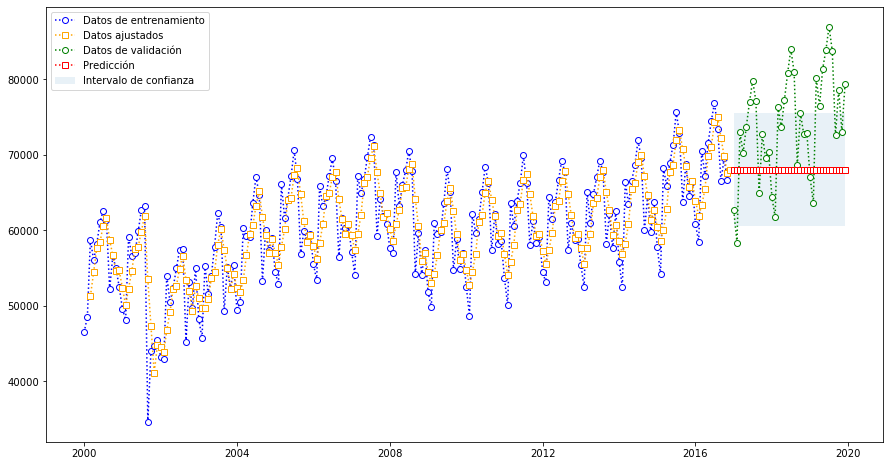

In [21]:
# Calcular el margen de error
error_3 = df_train_sma['pasajeros'] - df_train_sma['ajust_3']
me_3 = 1.96*error_3.std()
# Visalización
plt.figure(figsize=(15,8))
plt.plot(df_train_sma['mes'],df_train_sma['pasajeros'],'bo:',markerfacecolor='w')
# Datos de entrenamiento
plt.plot(df_train_sma['mes'],df_train_sma['ajust_3'],'s:',color='orange',markerfacecolor='w')


plt.plot(df_test_sma['mes'],df_test_sma['pasajeros'],'go:',markerfacecolor='w')
# Predicciones
plt.plot(df_test_sma['mes'],df_test_sma['prediccion'],'s:',color='red',markerfacecolor='w')

# Intervalo de confianza
plt.fill_between(df_test_sma['mes'],(df_test_sma['prediccion']+me_3),(df_test_sma['prediccion']-me_3),alpha=0.1)
plt.legend(['Datos de entrenamiento','Datos ajustados','Datos de validación','Predicción','Intervalo de confianza'])

# Escalado
# start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
# end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,
#          xmax=end_date)
plt.show()

## Media móvil $q$ periodos
El paramétro q se evidencia en el correlograma de la función de autocorrelación (ACF).

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

In [23]:
diferencia = df_train_sma['pasajeros'].diff()

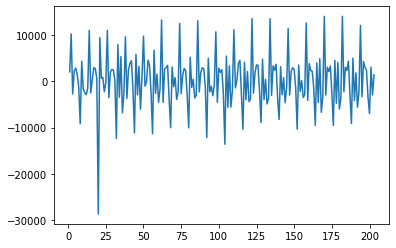

In [24]:
plt.plot(diferencia)

In [26]:
diferencia

1       2034.0
2      10238.0
3      -2731.0
4       2168.0
5       2872.0
        ...   
199    -3436.0
200    -6973.0
201     3062.0
202    -2948.0
203     1392.0
Name: pasajeros, Length: 203, dtype: float64

In [25]:
# remove the missing values
diferencia.dropna(inplace=True)

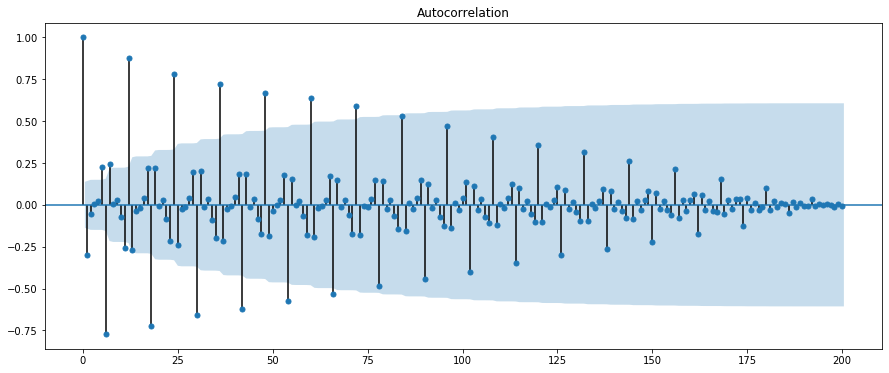

In [27]:
fig,ax = plt.subplots(figsize=(15,6))
fig = plot_acf(diferencia,lags=200,ax=ax)

por debajo del color azul, no tienen significancia. OSea hasta 68 aprox. Ahi me da el valor de los lags. Sin embargo se considero que era de 62.

**De acuerdo al correlograma se necesita seleccionar al menos 62 lags para hacer predicciones**

In [28]:
df_train_sma['ajust_62'] = df_train_sma['pasajeros'].rolling(window=62).mean()

In [29]:
df_train_sma.tail()

,mes,pasajeros,ajust_3,ajust_62
199,2016-08-01,73450,74946.000000,63984.967742
200,2016-09-01,66477,72271.000000,63929.580645
201,2016-10-01,69539,69822.000000,63981.838710
202,2016-11-01,66591,67535.666667,64119.306452
203,2016-12-01,67983,68037.666667,64228.661290


In [32]:
df_test_sma['prediccion_62'] = 64228.661290

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

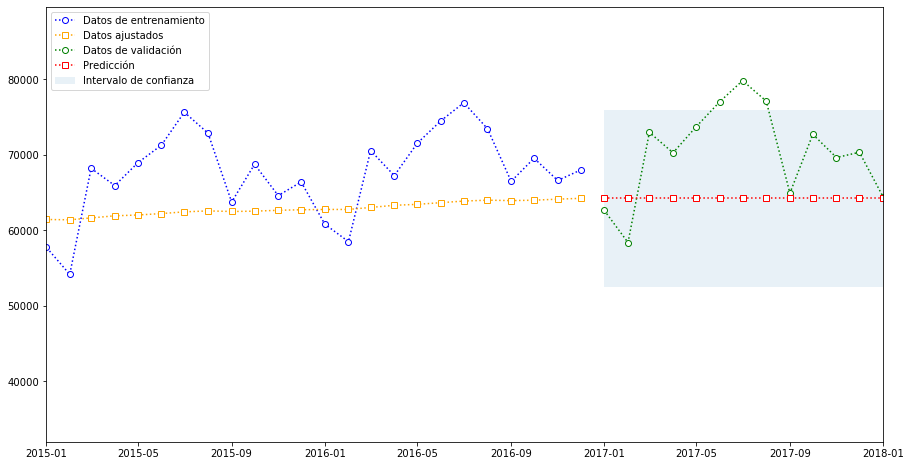

In [33]:
error_62 = df_train_sma['pasajeros'] - df_train_sma['ajust_62']
me_62 = 1.96*error_62.std()

plt.figure(figsize=(15,8))
plt.plot(df_train_sma['mes'],df_train_sma['pasajeros'],'bo:',markerfacecolor='w')

plt.plot(df_train_sma['mes'],df_train_sma['ajust_62'],'s:',color='orange',markerfacecolor='w')


plt.plot(df_test_sma['mes'],df_test_sma['pasajeros'],'go:',markerfacecolor='w')

plt.plot(df_test_sma['mes'],df_test_sma['prediccion_62'],'s:',color='red',markerfacecolor='w')

plt.fill_between(df_test_sma['mes'],(df_test_sma['prediccion_62']+me_62),(df_test_sma['prediccion_62']-me_62),alpha=0.1)
plt.legend(['Datos de entrenamiento','Datos ajustados','Datos de validación','Predicción','Intervalo de confianza'])

start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
plt.axis(xmin=start_date,
         xmax=end_date)

plt.show()

## Media móvil ponderada 3 periodos

In [36]:
df_test_wma = df_train[['mes','pasajeros']]
df_test_wma = df_test[['mes','pasajeros']]

In [35]:
df_train_wma.head()

NameError: name 'df_train_wma' is not defined

In [38]:
# Ejemplo: Se deben asignar pesos a los valores de la serie de tiempo
# los pesos mayores deben corresponder a las observaciones más recientes
(3 * 58764 + 2 * 48526 + 1 * 46492)/(3+2+1) # -> wma

53306.0

In [39]:
def weighted_moving_average(x):
  weights = np.arange(1,len(x)+1,+1) #inicia, termina, incremento
  num = np.sum(x * weights)
  den = np.sum(weights)
  wma = num / den
  return wma

In [40]:
ejemplo = df_train_wma.head()

NameError: name 'df_train_wma' is not defined

In [ ]:
ejemplo

In [ ]:
(3*58764 + 48526 * 2 +46492)/(6)

In [ ]:
ejemplo['pasajeros'].rolling(window=3).apply(weighted_moving_average)

In [ ]:
# applying to entire data
df_train_wma['ajust_wma_3'] = df_train_wma['pasajeros'].rolling(window=3).apply(weighted_moving_average)
df_train_wma['ajust_wma_62'] = df_train_wma['pasajeros'].rolling(window=62).apply(weighted_moving_average)

In [ ]:
df_train_wma.head()

In [ ]:
df_train_wma.tail()

In [ ]:
df_test_wma['prediccion_3'] = 67778.333333
df_test_wma['prediccion_62'] = 65983.619560

**Gráfica con 62 lags**

In [ ]:
error_62 = df_train_wma['pasajeros'] - df_train_wma['ajust_wma_62']
me_62 = 1.96*error_62.std()

plt.figure(figsize=(15,8))
plt.plot(df_train_wma['mes'],df_train_wma['pasajeros'],'bo:',markerfacecolor='w')

plt.plot(df_train_wma['mes'],df_train_wma['ajust_wma_62'],'s:',color='orange',markerfacecolor='w')


plt.plot(df_test_wma['mes'],df_test_wma['pasajeros'],'go:',markerfacecolor='w')

plt.plot(df_test_wma['mes'],df_test_wma['prediccion_62'],'s:',color='red',markerfacecolor='w')

plt.fill_between(df_test_wma['mes'],(df_test_wma['prediccion_62']+me_62),(df_test_wma['prediccion_62']-me_62),alpha=0.1)
plt.legend(['Datos de entrenamiento','Datos ajustados','Datos de validación','Predicción','Intervalo de confianza'])

# scalling
# start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
# end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,
#          xmax=end_date)

plt.show()

## Suavizamiento exponencial

In [41]:
df_train_ema = df_train[['mes','pasajeros']]
df_test_ema = df_test[['mes','pasajeros']]

In [42]:
df_train_ema['ajust_3'] = df_train_ema['pasajeros'].ewm(min_periods=3,alpha=0.5).mean()

In [43]:
df_train_ema.head()

,mes,pasajeros,ajust_3
0,2000-01-01,46492,NaN
1,2000-02-01,48526,NaN
2,2000-03-01,58764,54085.714286
3,2000-04-01,56033,55124.266667
4,2000-05-01,58201,56712.258065


In [44]:
df_train_ema.tail()

,mes,pasajeros,ajust_3
199,2016-08-01,73450,73886.632073
200,2016-09-01,66477,70181.816036
201,2016-10-01,69539,69860.408018
202,2016-11-01,66591,68225.704009
203,2016-12-01,67983,68104.352005


In [45]:
df_test_ema['prediccion_3'] = 68104.352005

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future versi

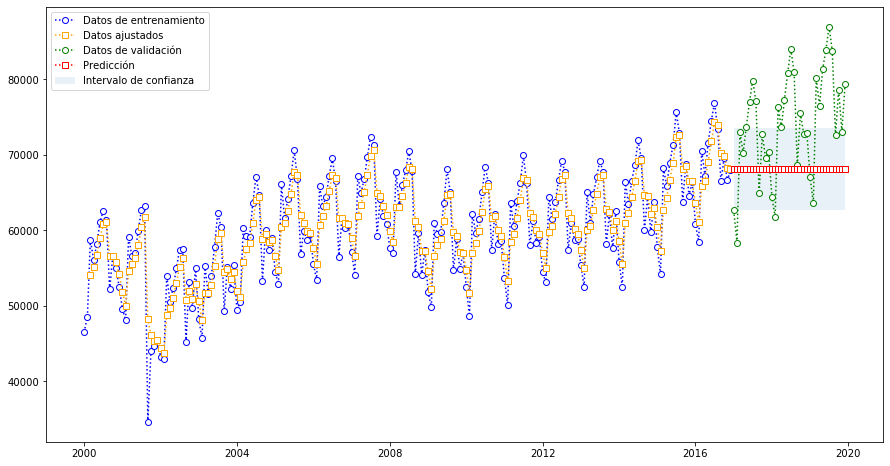

In [46]:
error_0_3 = df_train_ema['pasajeros'] - df_train_ema['ajust_3']
me_0_3 = 1.96*error_0_3.std()

plt.figure(figsize=(15,8))
plt.plot(df_train_ema['mes'],df_train_ema['pasajeros'],'bo:',markerfacecolor='w')

plt.plot(df_train_ema['mes'],df_train_ema['ajust_3'],'s:',color='orange',markerfacecolor='w')

plt.plot(df_test_ema['mes'],df_test_ema['pasajeros'],'go:',markerfacecolor='w')

plt.plot(df_test_ema['mes'],df_test_ema['prediccion_3'],'s:',color='red',markerfacecolor='w')

plt.fill_between(df_test_ema['mes'],(df_test_ema['prediccion_3']+me_0_3),
                 (df_test_ema['prediccion_3']-me_0_3),alpha=0.1)
plt.legend(['Datos de entrenamiento','Datos ajustados','Datos de validación','Predicción','Intervalo de confianza'])

# start_date = datetime.datetime.strptime("2015-01-01","%Y-%m-%d")
# end_date = datetime.datetime.strptime("2018-01-01","%Y-%m-%d")
# plt.axis(xmin=start_date,
#          xmax=end_date)

plt.show()